<a href="https://colab.research.google.com/github/bagascahyawiguna/BPML/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model Training dari Scraping Review Magic Chess: Go Go**

# **Import Library**

In [50]:
#Library Deep Learning
!pip install numpy==1.23.5 scipy==1.10.1 gensim==4.3.1 tensorflow==2.12.0

In [51]:
import numpy, scipy, gensim, tensorflow
print(f"NumPy: {numpy.__version__}")
print(f"SciPy: {scipy.__version__}")
print(f"Gensim: {gensim.__version__}")
print(f"TensorFlow: {tensorflow.__version__}")

NumPy: 1.23.5
SciPy: 1.10.1
Gensim: 4.3.1
TensorFlow: 2.12.0


In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import pandas as pd  # Untuk manipulasi data
pd.options.mode.chained_assignment = None

import numpy as np  # Untuk operasi numerik
seed = 0
np.random.seed(seed)

import matplotlib.pyplot as plt  # Untuk visualisasi
import seaborn as sns  # Untuk visualisasi

import re  # Untuk regex (pembersihan teks)
import string  # Untuk pemrosesan teks

# Untuk NLP:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

!pip install sastrawi  # Masih perlu untuk stemming bahasa Indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud  # Untuk visualisasi teks

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Loading Dataset**

In [54]:
kredivo_reviews_df = pd.read_csv('/content/drive/MyDrive/Dataset/BPML/ulasan_kredivo.csv')

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = kredivo_reviews_df.shape

kredivo_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,98c535cf-16c3-44a2-ac2b-f8303e225894,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"aplikasi aneh!!! gabisa dibuka, loading mulu. CS di hubungi lewat email juga berbelit-belit ga langsung ada solusi. Mana ada aplikasi seburuk ini??? padahal sinyal stabil, tapi bener2 ngadat gabisa kebuka, gabisa dipake, parahhhhh. semoga bangkrut aja.",1,201,3.58.1,2025-03-17 13:16:38,"Hi Kak Yeni,\n\nMaaf atas kendalanya. Pastikan jaringan internet Kakak dalam keadaan stabil saat mengakses aplikasi Kredivo. Jika masih mengalami kendala, kamu bisa reinstall aplikasi Kredivo terlebih dahulu atau menghubungi CS email kami di support@kredivo.com dan nomor layanan di 08041573348.\n\nSalam hangat, Navya",2025-03-17 15:10:55,3.58.1
1,db016757-921b-454d-b8db-73c2de221e27,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"2 kali baru bisa cair, Untuk ke 3 kali gabisa di pake transaksi apapun. Udah lunas tgl 21 Januari sampe detik ini belum bisa di pake limitnya. Di telponin cs kredivo ""kenapa belum ada transaksi lagi kak"" mikir Weh pake di tanya lagi kenapa. Padahal gapernah telat bayar, bayar selalu sebelum jatuh tempo. Tiba tiba kredivo score c. Mau transaksi apapun ga bisa. Yg bayarnya ga pernah telat di giniin sih.",5,688,3.58.1,2025-03-13 05:53:55,"Hi Kak Desi,\n\nTerima kasih atas ratingnya :). Semoga Kredivo dapat memberikan kemudahan dan kenyamanan pembayaran transaksi Kakak. Jika memiliki kendala, silakan hubungi customer support di 08041573348 atau email ke support@kredivo.com menggunakan email yang terdaftar dan layanan live chat pada aplikasi.\n\nSalam hangat,\nDina",2025-03-13 06:14:51,3.58.1
2,bfcf39c3-04b0-4307-84cf-a739d7925c24,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"awal bisa berjalan lancar, tapi kok malah ada tulisan apk berbahaya. dan tiba2 keluar sendiri. jika sampai saat pembayaran seperti ini terus bagaimana. yang disalahkan pihak saya bukan kredivo padahal apknya bermasalah. SEGERA PERBAIKIN DONG !!!! dan saya tidak pernah telat bayar kenapa kredivo saya di blokir",2,32,3.59.2,2025-04-03 00:28:12,"Hi Kak Felisitas,\n\nMaaf atas kendalanya. Pastikan jaringan internet Kakak dalam keadaan stabil. Jika masih mengalami kendala, maka bisa reinstall aplikasi Kredivo terlebih dahulu atau hubungi CS di nomor layanan 08041573348. Nomor VA pembayaran bisa dilihat pada email terdaftar jika sudah mendekati jatuh tempo.\n\nSalam hangat, Yana",2025-04-03 08:44:49,3.59.2
3,0347af5d-87fe-4c34-af70-7c859d3d2785,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Awalnya membantu, tapi yg saya rasakan. Saya selalu bayar tepat wktu bahkan sebelum jatuh tempo, tiba tiba akun mati g bjsa dipakai dg alasan ada transaksi berbahaya. Sejak itu akun saya g bisa dipakai. Barusan email tidak bisa menjawab pertanyaan saya. Aplikasi sampah!",1,107,3.58.1,2025-03-18 01:17:42,"Hi Kak Lukitahari,\n\nMaaf atas kendalanya. Jika akun Kredivo Kakak tertangguhkan, dikhawatirkan karena isu keamanan transaksi atau isu keamanan akun. Mengenai setiap transaksi telah dilakukan penilaian oleh Kredivo. Pengecekan lebih lanjut, silakan hubungi tim support kami di nomor 08041573348, email ke support@kredivo.com.\n\nSalam hangat, Erfan",2025-03-18 10:06:50,3.58.1
4,dc665882-aabf-4b74-a08c-eda5ffb0003c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Pembayaran selalu tepat waktu bahkan sudah dilunasi semua sebelum tanggal jatuh tempo nya. Tapi setelah limit kembali seperti semula awal. Mau dipakai transaksi lagi nggak

In [55]:
kredivo_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85500 entries, 0 to 85499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              85500 non-null  object
 1   userName              85500 non-null  object
 2   userImage             85500 non-null  object
 3   content               85500 non-null  object
 4   score                 85500 non-null  int64 
 5   thumbsUpCount         85500 non-null  int64 
 6   reviewCreatedVersion  69395 non-null  object
 7   at                    85500 non-null  object
 8   replyContent          77389 non-null  object
 9   repliedAt             77389 non-null  object
 10  appVersion            69395 non-null  object
dtypes: int64(2), object(9)
memory usage: 7.2+ MB


In [56]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = kredivo_reviews_df.dropna()

In [57]:
# Menampilkan informasi tentang DataFrame clean_df setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63027 entries, 0 to 85497
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              63027 non-null  object
 1   userName              63027 non-null  object
 2   userImage             63027 non-null  object
 3   content               63027 non-null  object
 4   score                 63027 non-null  int64 
 5   thumbsUpCount         63027 non-null  int64 
 6   reviewCreatedVersion  63027 non-null  object
 7   at                    63027 non-null  object
 8   replyContent          63027 non-null  object
 9   repliedAt             63027 non-null  object
 10  appVersion            63027 non-null  object
dtypes: int64(2), object(9)
memory usage: 5.8+ MB


In [58]:
# Cek duplikasi
print("Jumlah duplikasi: ", clean_df.duplicated().sum())

Jumlah duplikasi:  0


In [59]:
# Cek jumlah baris dan kolom
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape
print("Jumlah Baris dan Kolom:")
print(clean_df.shape)

Jumlah Baris dan Kolom:
(63027, 11)


# **Preprocessing**

## 1. **cleaningText(text)**

Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

In [60]:
# Fungsi untuk membersihkan teks dari karakter/tanda yang tidak diinginkan
def cleaningText(text):
    # Menghapus mention (@username) dari teks
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    # Menghapus hashtag (#topik) dari teks
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    # Menghapus tanda RT (retweet)
    text = re.sub(r'RT[\s]', '', text)
    # Menghapus semua URL/link web
    text = re.sub(r"http\S+", '', text)
    # Menghapus angka/digit dari teks
    text = re.sub(r'[0-9]+', '', text)
    # Menghapus karakter khusus (hanya menyisakan huruf dan spasi)
    text = re.sub(r'[^\w\s]', '', text)

    # Mengganti newline dengan spasi
    text = text.replace('\n', ' ')
    # Menghapus semua tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Menghilangkan spasi di awal/akhir teks
    text = text.strip(' ')
    return text

## 2. **casefoldingText(text)**

Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

In [61]:
# Fungsi untuk mengubah teks menjadi huruf kecil semua
def casefoldingText(text):
    # Konversi semua karakter ke lowercase
    text = text.lower()
    return text

## 3. **tokenizingText(text)**

Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

In [62]:
# Fungsi untuk memecah teks menjadi kata-kata individual (tokenisasi)
def tokenizingText(text):
    # Memisahkan teks menjadi token kata menggunakan word_tokenize dari NLTK
    text = word_tokenize(text)
    return text

## 4. **filteringText(text)**

Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

In [63]:
# Fungsi untuk menyaring kata-kata umum (stopwords)
def filteringText(text):
    # Mengambil daftar stopwords bahasa Indonesia
    listStopwords = set(stopwords.words('indonesian'))
    # Mengambil daftar stopwords bahasa Inggris
    listStopwords1 = set(stopwords.words('english'))
    # Menggabungkan kedua daftar stopwords
    listStopwords.update(listStopwords1)
    # Menambahkan stopwords kustom
    listStopwords.update(['iya','yaa', 'si', 'gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])

    # Menyaring kata-kata yang bukan stopwords
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

## 5. **stemmingText(text)**

Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

In [64]:
# Fungsi untuk mengubah kata ke bentuk dasar (stemming)
def stemmingText(text):
    # Membuat stemmer untuk bahasa Indonesia menggunakan Sastrawi
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memisahkan teks menjadi kata-kata
    words = text.split()

    # Melakukan stemming untuk setiap kata
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem kembali menjadi kalimat
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

## 6. **toSentence(list_words)**

Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

In [65]:
# Fungsi untuk mengubah list kata menjadi kalimat utuh
def toSentence(list_words):
    # Menggabungkan kata-kata dengan spasi menjadi satu kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [66]:
slangwords = {"@": "di", "spah": "sumpah", "gaje": "tidak jelas", "gim": "game", "gem": "game", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [67]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,98c535cf-16c3-44a2-ac2b-f8303e225894,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"aplikasi aneh!!! gabisa dibuka, loading mulu. CS di hubungi lewat email juga berbelit-belit ga langsung ada solusi. Mana ada aplikasi seburuk ini??? padahal sinyal stabil, tapi bener2 ngadat gabisa kebuka, gabisa dipake, parahhhhh. semoga bangkrut aja.",1,201,3.58.1,2025-03-17 13:16:38,"Hi Kak Yeni,\n\nMaaf atas kendalanya. Pastikan jaringan internet Kakak dalam keadaan stabil saat mengakses aplikasi Kredivo. Jika masih mengalami kendala, kamu bisa reinstall aplikasi Kredivo terlebih dahulu atau menghubungi CS email kami di support@kredivo.com dan nomor layanan di 08041573348.\n\nSalam hangat, Navya",2025-03-17 15:10:55,3.58.1
1,db016757-921b-454d-b8db-73c2de221e27,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"2 kali baru bisa cair, Untuk ke 3 kali gabisa di pake transaksi apapun. Udah lunas tgl 21 Januari sampe detik ini belum bisa di pake limitnya. Di telponin cs kredivo ""kenapa belum ada transaksi lagi kak"" mikir Weh pake di tanya lagi kenapa. Padahal gapernah telat bayar, bayar selalu sebelum jatuh tempo. Tiba tiba kredivo score c. Mau transaksi apapun ga bisa. Yg bayarnya ga pernah telat di giniin sih.",5,688,3.58.1,2025-03-13 05:53:55,"Hi Kak Desi,\n\nTerima kasih atas ratingnya :). Semoga Kredivo dapat memberikan kemudahan dan kenyamanan pembayaran transaksi Kakak. Jika memiliki kendala, silakan hubungi customer support di 08041573348 atau email ke support@kredivo.com menggunakan email yang terdaftar dan layanan live chat pada aplikasi.\n\nSalam hangat,\nDina",2025-03-13 06:14:51,3.58.1
2,bfcf39c3-04b0-4307-84cf-a739d7925c24,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"awal bisa berjalan lancar, tapi kok malah ada tulisan apk berbahaya. dan tiba2 keluar sendiri. jika sampai saat pembayaran seperti ini terus bagaimana. yang disalahkan pihak saya bukan kredivo padahal apknya bermasalah. SEGERA PERBAIKIN DONG !!!! dan saya tidak pernah telat bayar kenapa kredivo saya di blokir",2,32,3.59.2,2025-04-03 00:28:12,"Hi Kak Felisitas,\n\nMaaf atas kendalanya. Pastikan jaringan internet Kakak dalam keadaan stabil. Jika masih mengalami kendala, maka bisa reinstall aplikasi Kredivo terlebih dahulu atau hubungi CS di nomor layanan 08041573348. Nomor VA pembayaran bisa dilihat pada email terdaftar jika sudah mendekati jatuh tempo.\n\nSalam hangat, Yana",2025-04-03 08:44:49,3.59.2
3,0347af5d-87fe-4c34-af70-7c859d3d2785,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Awalnya membantu, tapi yg saya rasakan. Saya selalu bayar tepat wktu bahkan sebelum jatuh tempo, tiba tiba akun mati g bjsa dipakai dg alasan ada transaksi berbahaya. Sejak itu akun saya g bisa dipakai. Barusan email tidak bisa menjawab pertanyaan saya. Aplikasi sampah!",1,107,3.58.1,2025-03-18 01:17:42,"Hi Kak Lukitahari,\n\nMaaf atas kendalanya. Jika akun Kredivo Kakak tertangguhkan, dikhawatirkan karena isu keamanan transaksi atau isu keamanan akun. Mengenai setiap transaksi telah dilakukan penilaian oleh Kredivo. Pengecekan lebih lanjut, silakan hubungi tim support kami di nomor 08041573348, email ke support@kredivo.com.\n\nSalam hangat, Erfan",2025-03-18 10:06:50,3.58.1
4,dc665882-aabf-4b74-a08c-eda5ffb0003c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Pembayaran selalu tepat waktu bahkan sudah dilunasi semua sebelum tanggal jatuh tempo nya. Tapi setelah limit kembali seperti semula awal. Mau dipakai transaksi lagi nggak

In [68]:
# Membersihkan teks dari kolom 'content' menggunakan fungsi cleaningText dan menyimpan hasilnya di kolom baru 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah format huruf pada teks di kolom 'text_clean' menggunakan fungsi casefoldingText dan menyimpan hasilnya di kolom 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang/gaul pada teks di kolom 'text_casefoldingText' dengan kata baku menggunakan fungsi fix_slangwords
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks dari kolom 'text_slangwords' menjadi token-token kata menggunakan fungsi tokenizingText
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus stopwords (kata-kata umum yang tidak penting) dari kolom 'text_tokenizingText' menggunakan fungsi filteringText
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan kembali token-token kata dari kolom 'text_stopword' menjadi sebuah kalimat utuh menggunakan fungsi toSentence
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [69]:
clean_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,98c535cf-16c3-44a2-ac2b-f8303e225894,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"aplikasi aneh!!! gabisa dibuka, loading mulu. CS di hubungi lewat email juga berbelit-belit ga langsung ada solusi. Mana ada aplikasi seburuk ini??? padahal sinyal stabil, tapi bener2 ngadat gabisa kebuka, gabisa dipake, parahhhhh. semoga bangkrut aja.",1,201,3.58.1,2025-03-17 13:16:38,"Hi Kak Yeni,\n\nMaaf atas kendalanya. Pastikan jaringan internet Kakak dalam keadaan stabil saat mengakses aplikasi Kredivo. Jika masih mengalami kendala, kamu bisa reinstall aplikasi Kredivo terlebih dahulu atau menghubungi CS email kami di support@kredivo.com dan nomor layanan di 08041573348.\n\nSalam hangat, Navya",2025-03-17 15:10:55,3.58.1,aplikasi aneh gabisa dibuka loading mulu CS di hubungi lewat email juga berbelitbelit ga langsung ada solusi Mana ada aplikasi seburuk ini padahal sinyal stabil tapi bener ngadat gabisa kebuka gabisa dipake parahhhhh semoga bangkrut aja,aplikasi aneh gabisa dibuka loading mulu cs di hubungi lewat email juga berbelitbelit ga langsung ada solusi mana ada aplikasi seburuk ini padahal sinyal stabil tapi bener ngadat gabisa kebuka gabisa dipake parahhhhh semoga bangkrut aja,aplikasi aneh gabisa dibuka loading melulu cs di hubungi lewat email juga berbelitbelit ga langsung ada solusi mana ada aplikasi seburuk ini padahal sinyal stabil tapi benar ngadat gabisa kebuka gabisa dipake parahhhhh semoga bangkrut saja,"[aplikasi, aneh, gabisa, dibuka, loading, melulu, cs, di, hubungi, lewat, email, juga, berbelitbelit, ga, langsung, ada, solusi, mana, ada, aplikasi, seburuk, ini, padahal, sinyal, stabil, tapi, benar, ngadat, gabisa, kebuka, gabisa, dipake, parahhhhh, semoga, bangkrut, saja]","[aplikasi, aneh, gabisa, dibuka, loading, melulu, cs, hubungi, email, berbelitbelit, langsung, solusi, aplikasi, seburuk, sinyal, stabil, ngadat, gabisa, kebuka, gabisa, dipake, parahhhhh, semoga, bangkrut]",aplikasi aneh gabisa dibuka loading melulu cs hubungi email berbelitbelit langsung solusi aplikasi seburuk sinyal stabil ngadat gabisa kebuka gabisa dipake parahhhhh semoga bangkrut
1,db016757-921b-454d-b8db-73c2de221e27,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"2 kali baru bisa cair, Untuk ke 3 kali gabisa di pake transaksi apapun. Udah lunas tgl 21 Januari sampe detik ini belum bisa di pake limitnya. Di telponin cs kredivo ""kenapa belum ada transaksi lagi kak"" mikir Weh pake di tanya lagi kenapa. Padahal gapernah telat bayar, bayar selalu sebelum jatuh tempo. Tiba tiba kredivo score c. Mau transaksi apapun ga bisa. Yg bayarnya ga pernah telat di giniin sih.",5,688,3.58.1,2025-03-13 05:53:55,"Hi Kak Desi,\n\nTerima kasih atas ratingnya :). Semoga Kredivo dapat memberikan kemudahan dan kenyamanan pembayaran transaksi Kakak. Jika memiliki kendala, silakan hubungi customer support di 08041573348 atau email ke support@kredivo.com menggunakan email yang terdaftar dan layanan live chat pada aplikasi.\n\nSalam hangat,\nDina",2025-03-13 06:14:51,3.58.1,kali baru bisa cair Untuk ke kali gabisa di pake transaksi apapun Udah lunas tgl Januari sampe detik ini belum bisa di pake limitnya Di telponin cs kredivo kenapa belum ada transaksi lagi kak mikir Weh pake di tanya lagi kenapa Padahal gapernah telat bayar bayar selalu sebelum jatuh tempo Tiba tiba kredivo score c Mau transaksi apapun ga bisa Yg bayarnya ga pernah telat di giniin sih,kali baru bisa cair untuk ke kali gabisa di pake transaksi apapun udah lunas tgl januari sampe detik ini belum bisa di pake limitnya di telponin cs kredivo kenapa belum ada transaksi lagi kak mikir weh pake di tanya lagi kenapa pad

# **Pelabelan**

In [70]:
# Mengimpor library csv untuk membaca file CSV
import csv
# Mengimpor library requests untuk membuat HTTP requests
import requests
# Mengimpor StringIO dari io untuk mengubah string menjadi objek seperti file
from io import StringIO

# Membuat dictionary kosong untuk menyimpan leksikon positif
lexicon_positive = dict()

# Mengirim permintaan GET untuk mengambil file lexicon_positive.csv dari GitHub
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

# Memeriksa apakah permintaan berhasil (kode status 200)
if response.status_code == 200:
   # Membuat CSV reader untuk membaca data dari respons, dengan koma sebagai pembatas
   reader = csv.reader(StringIO(response.text), delimiter=',')

   # Mengiterasi setiap baris dalam data CSV
   for row in reader:
       # Menyimpan kata (kolom pertama) sebagai kunci dan nilai (kolom kedua) sebagai nilai dalam dictionary
       lexicon_positive[row[0]] = int(row[1])
else:
   # Menampilkan pesan error jika gagal mengambil data
   print("Failed to fetch positive lexicon data")

# Membuat dictionary kosong untuk menyimpan leksikon negatif
lexicon_negative = dict()

# Mengirim permintaan GET untuk mengambil file lexicon_negative.csv dari GitHub
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

# Memeriksa apakah permintaan berhasil (kode status 200)
if response.status_code == 200:
   # Membuat CSV reader untuk membaca data dari respons, dengan koma sebagai pembatas
   reader = csv.reader(StringIO(response.text), delimiter=',')

   # Mengiterasi setiap baris dalam data CSV
   for row in reader:
       # Menyimpan kata (kolom pertama) sebagai kunci dan nilai (kolom kedua) sebagai nilai dalam dictionary
       lexicon_negative[row[0]] = int(row[1])
else:
   # Menampilkan pesan error jika gagal mengambil data
   print("Failed to fetch negative lexicon data")

In [71]:
# Mendefinisikan fungsi untuk melakukan analisis sentimen berbasis leksikon bahasa Indonesia
def sentiment_analysis_lexicon_indonesia(text):

   # Inisialisasi variabel score untuk menyimpan nilai sentimen
   score = 0

   # Loop untuk memeriksa kata-kata yang cocok dengan leksikon positif
   for word in text:

       # Jika kata ditemukan dalam kamus leksikon positif
       if (word in lexicon_positive):
           # Menambahkan nilai sentimen positif ke dalam score
           score = score + lexicon_positive[word]

   # Loop untuk memeriksa kata-kata yang cocok dengan leksikon negatif
   for word in text:

       # Jika kata ditemukan dalam kamus leksikon negatif
       if (word in lexicon_negative):
           # Menambahkan nilai sentimen negatif ke dalam score
           score = score + lexicon_negative[word]

   # Inisialisasi variabel polaritas yang akan menampung hasil analisis sentimen
   polarity=''

   # Menentukan polaritas berdasarkan score sentimen
   if (score > 0):
       # Jika score lebih besar atau sama dengan 0, polaritas adalah positif
       polarity = 'positive'
   elif (score < 0):
       # Jika score kurang dari 0, polaritas adalah negatif
       polarity = 'negative'
   else:
       polarity = 'neutral'
   # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

   # Mengembalikan nilai score dan polaritas sebagai hasil fungsi
   return score, polarity

In [72]:
# Menerapkan fungsi sentiment_analysis_lexicon_indonesia pada setiap baris di kolom 'text_stopword'
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)

# Mengubah hasil menjadi dua list terpisah (satu untuk score dan satu untuk polaritas)
results = list(zip(*results))

# Menambahkan kolom 'polarity_score' ke DataFrame yang berisi nilai skor sentimen
clean_df['polarity_score'] = results[0]

# Menambahkan kolom 'polarity' ke DataFrame yang berisi nilai polaritas (positive/negative)
clean_df['polarity'] = results[1]

# Menampilkan jumlah nilai polaritas (menghitung berapa banyak data positif dan negatif)
print(clean_df['polarity'].value_counts())

polarity
negative    30528
positive    26837
neutral      5662
Name: count, dtype: int64


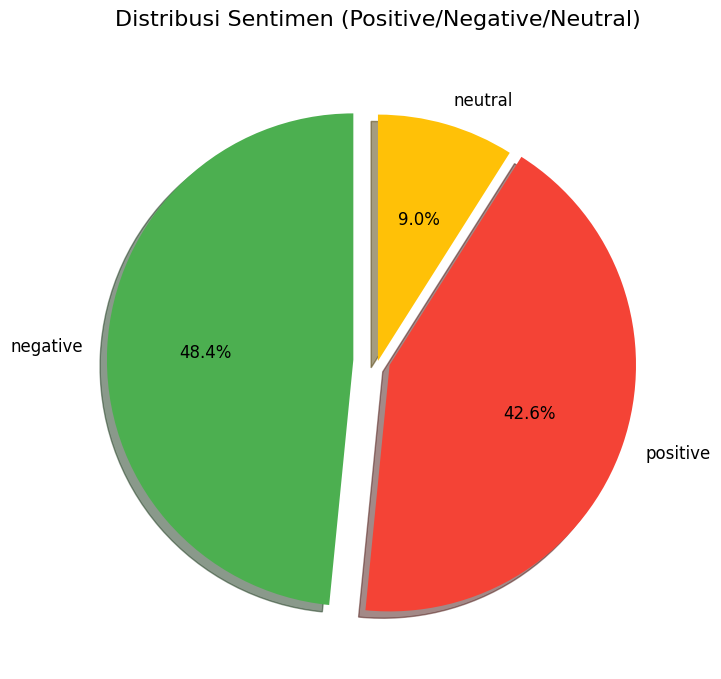

In [73]:
import matplotlib.pyplot as plt

# Hitung distribusi polaritas
polarity_counts = clean_df['polarity'].value_counts()

# Data untuk pie chart
sizes = polarity_counts.values
labels = polarity_counts.index

# Atur explode untuk ketiga kategori (positive, negative, neutral)
explode = (0.1, 0.05, 0)  # Positive agak terpisah, negative sedikit, neutral tidak

# Warna untuk setiap kategori (hijau, merah, kuning)
colors = ['#4CAF50', '#F44336', '#FFC107']

# Buat pie chart
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    x=sizes,
    labels=labels,
    autopct='%1.1f%%',
    explode=explode,
    colors=colors,
    shadow=True,
    startangle=90,
    textprops={'fontsize': 12}
)

ax.set_title('Distribusi Sentimen (Positive/Negative/Neutral)', fontsize=16, pad=20)
plt.show()

In [74]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3500)

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif.
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun.
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1

In [75]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3500)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1

In [76]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3500)

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif.
neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending).
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan.
neutral_tweets = neutral_tweets[0:10]

# Mengatur ulang indeks DataFrame agar dimulai dari 0.
neutral_tweets = neutral_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
neutral_tweets.index += 1

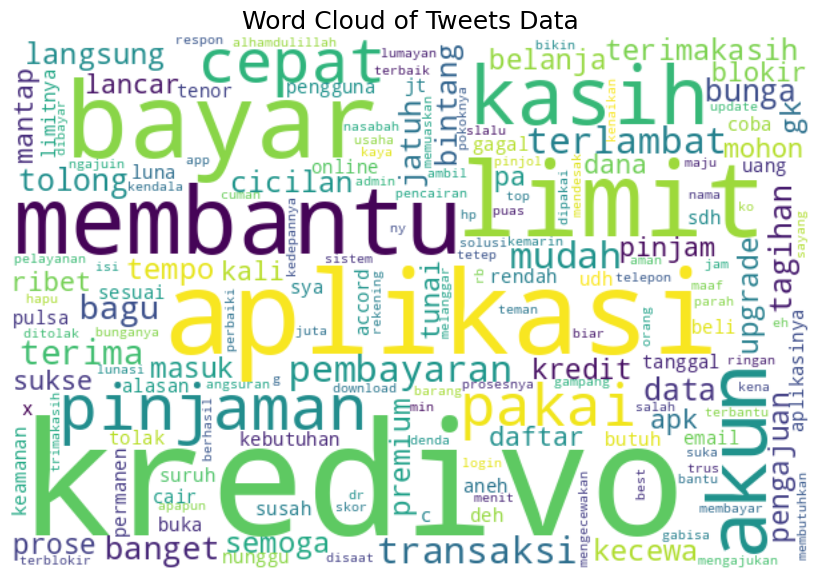

In [77]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Versi optimal dengan penggabungan string yang efisien
def generate_wordcloud_optimized(df, text_column='text_stopword'):

    # Mengumpulkan semua kata dengan list comprehension + join
    all_words = ' '.join([word for tweet in df[text_column] for word in tweet])

    # Membuat word cloud
    wordcloud = WordCloud(
        width=600,
        height=400,
        background_color='white',
        min_font_size=10,
        collocations=False  # Untuk menghindari pengulangan kata yang sering muncul bersama
    ).generate(all_words)

    # Visualisasi
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Word Cloud of Tweets Data', fontsize=18)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

# Pemanggilan fungsi
generate_wordcloud_optimized(clean_df, 'text_stopword')

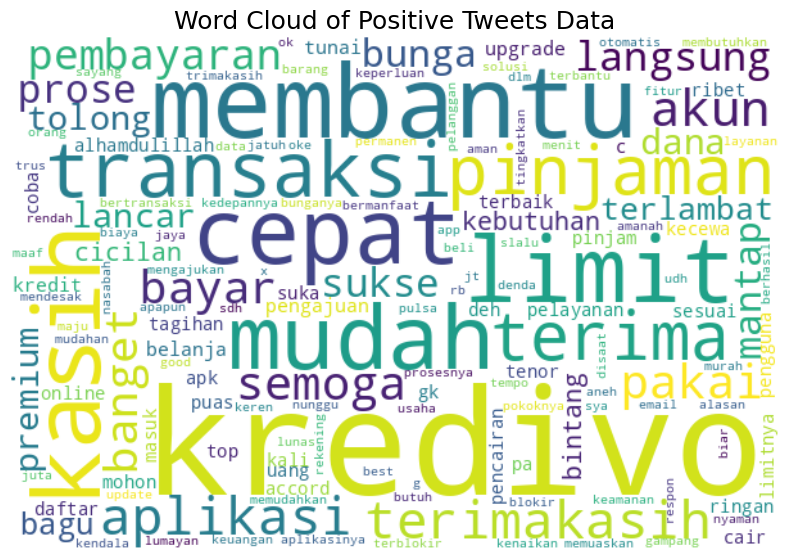

In [78]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_optimized_wordcloud(tweets_data, title='Word Cloud'):
    # OPTIMIZATION 1: Gunakan join() dengan generator expression
    all_text = ' '.join(word for tweet in tweets_data for word in tweet)

    # OPTIMIZATION 2: Batasi max_words untuk dataset sangat besar
    wordcloud = WordCloud(
        width=600,
        height=400,
        background_color='white',
        min_font_size=10,
        max_words=200,  # Membatasi jumlah kata untuk rendering lebih cepat
        collocations=False  # Mencegah pengulangan frase umum
    ).generate(all_text)

    # OPTIMIZATION 3: Simplifikasi visualisasi
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Cara penggunaan:
generate_optimized_wordcloud(positive_tweets['text_stopword'],
                           'Word Cloud of Positive Tweets Data')

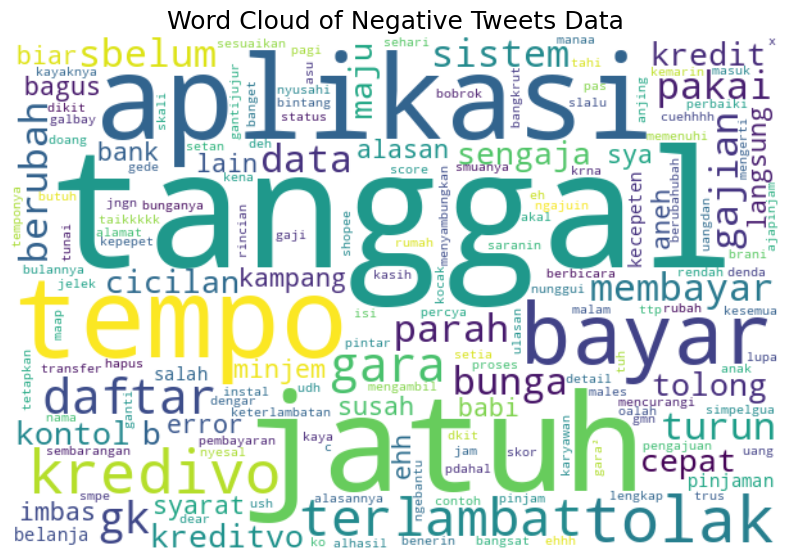

In [79]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_optimized_wordcloud(tweets_data, title='Word Cloud'):
    # OPTIMIZATION 1: Gunakan join() dengan generator expression
    all_text = ' '.join(word for tweet in tweets_data for word in tweet)

    # OPTIMIZATION 2: Batasi max_words untuk dataset sangat besar
    wordcloud = WordCloud(
        width=600,
        height=400,
        background_color='white',
        min_font_size=10,
        max_words=200,  # Membatasi jumlah kata untuk rendering lebih cepat
        collocations=False  # Mencegah pengulangan frase umum
    ).generate(all_text)

    # OPTIMIZATION 3: Simplifikasi visualisasi
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Cara penggunaan:
generate_optimized_wordcloud(negative_tweets['text_stopword'],
                           'Word Cloud of Negative Tweets Data')

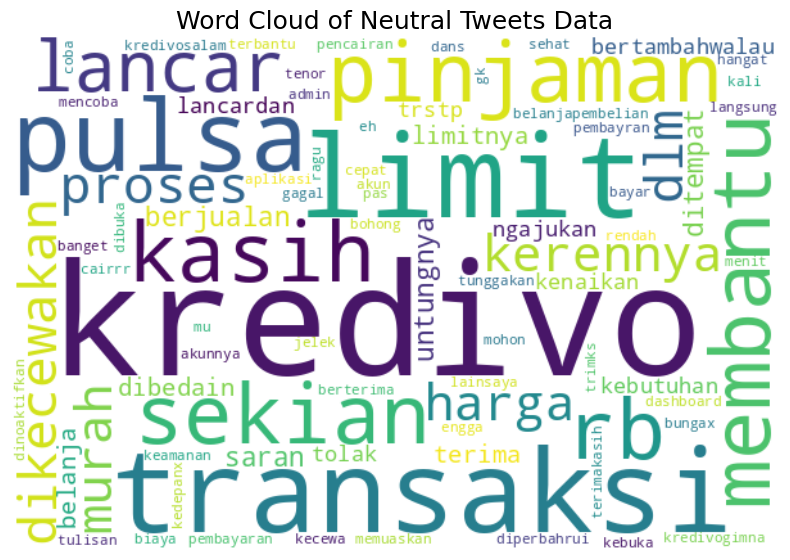

In [80]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_optimized_wordcloud(tweets_data, title='Word Cloud'):
    # OPTIMIZATION 1: Gunakan join() dengan generator expression
    all_text = ' '.join(word for tweet in tweets_data for word in tweet)

    # OPTIMIZATION 2: Batasi max_words untuk dataset sangat besar
    wordcloud = WordCloud(
        width=600,
        height=400,
        background_color='white',
        min_font_size=10,
        max_words=200,  # Membatasi jumlah kata untuk rendering lebih cepat
        collocations=False  # Mencegah pengulangan frase umum
    ).generate(all_text)

    # OPTIMIZATION 3: Simplifikasi visualisasi
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Cara penggunaan:
generate_optimized_wordcloud(neutral_tweets['text_stopword'],
                           'Word Cloud of Neutral Tweets Data')

<ipython-input-81-6392384a3564>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot_distribusi = sns.countplot(x='polarity', data=clean_df,


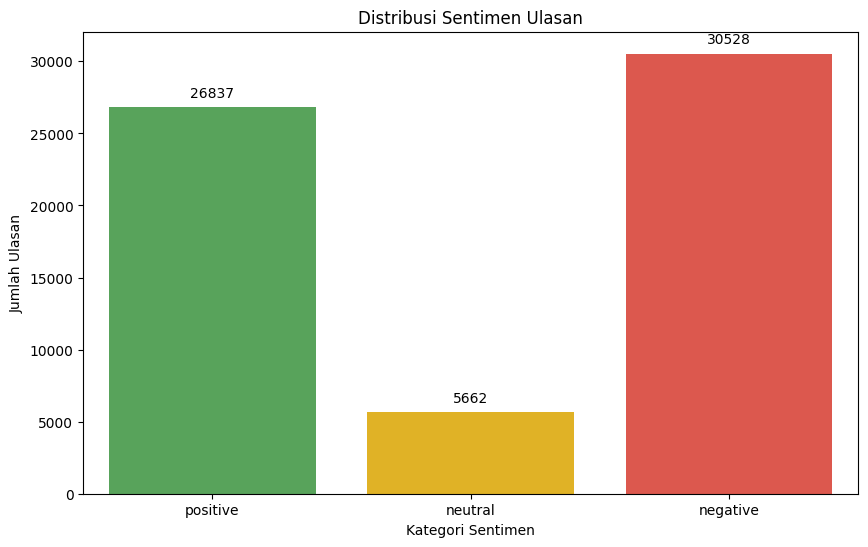

<ipython-input-81-6392384a3564>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='polarity', y='panjang_teks', data=clean_df,


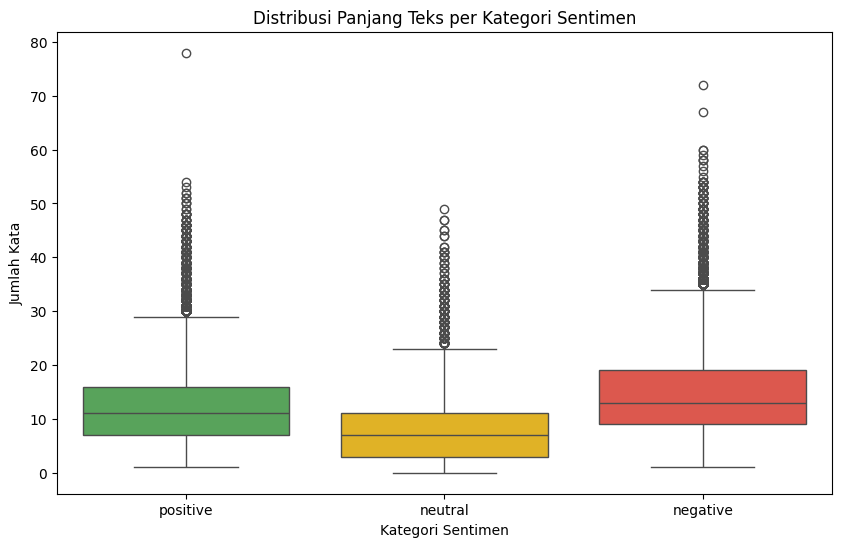

<Figure size 1200x1500 with 0 Axes>

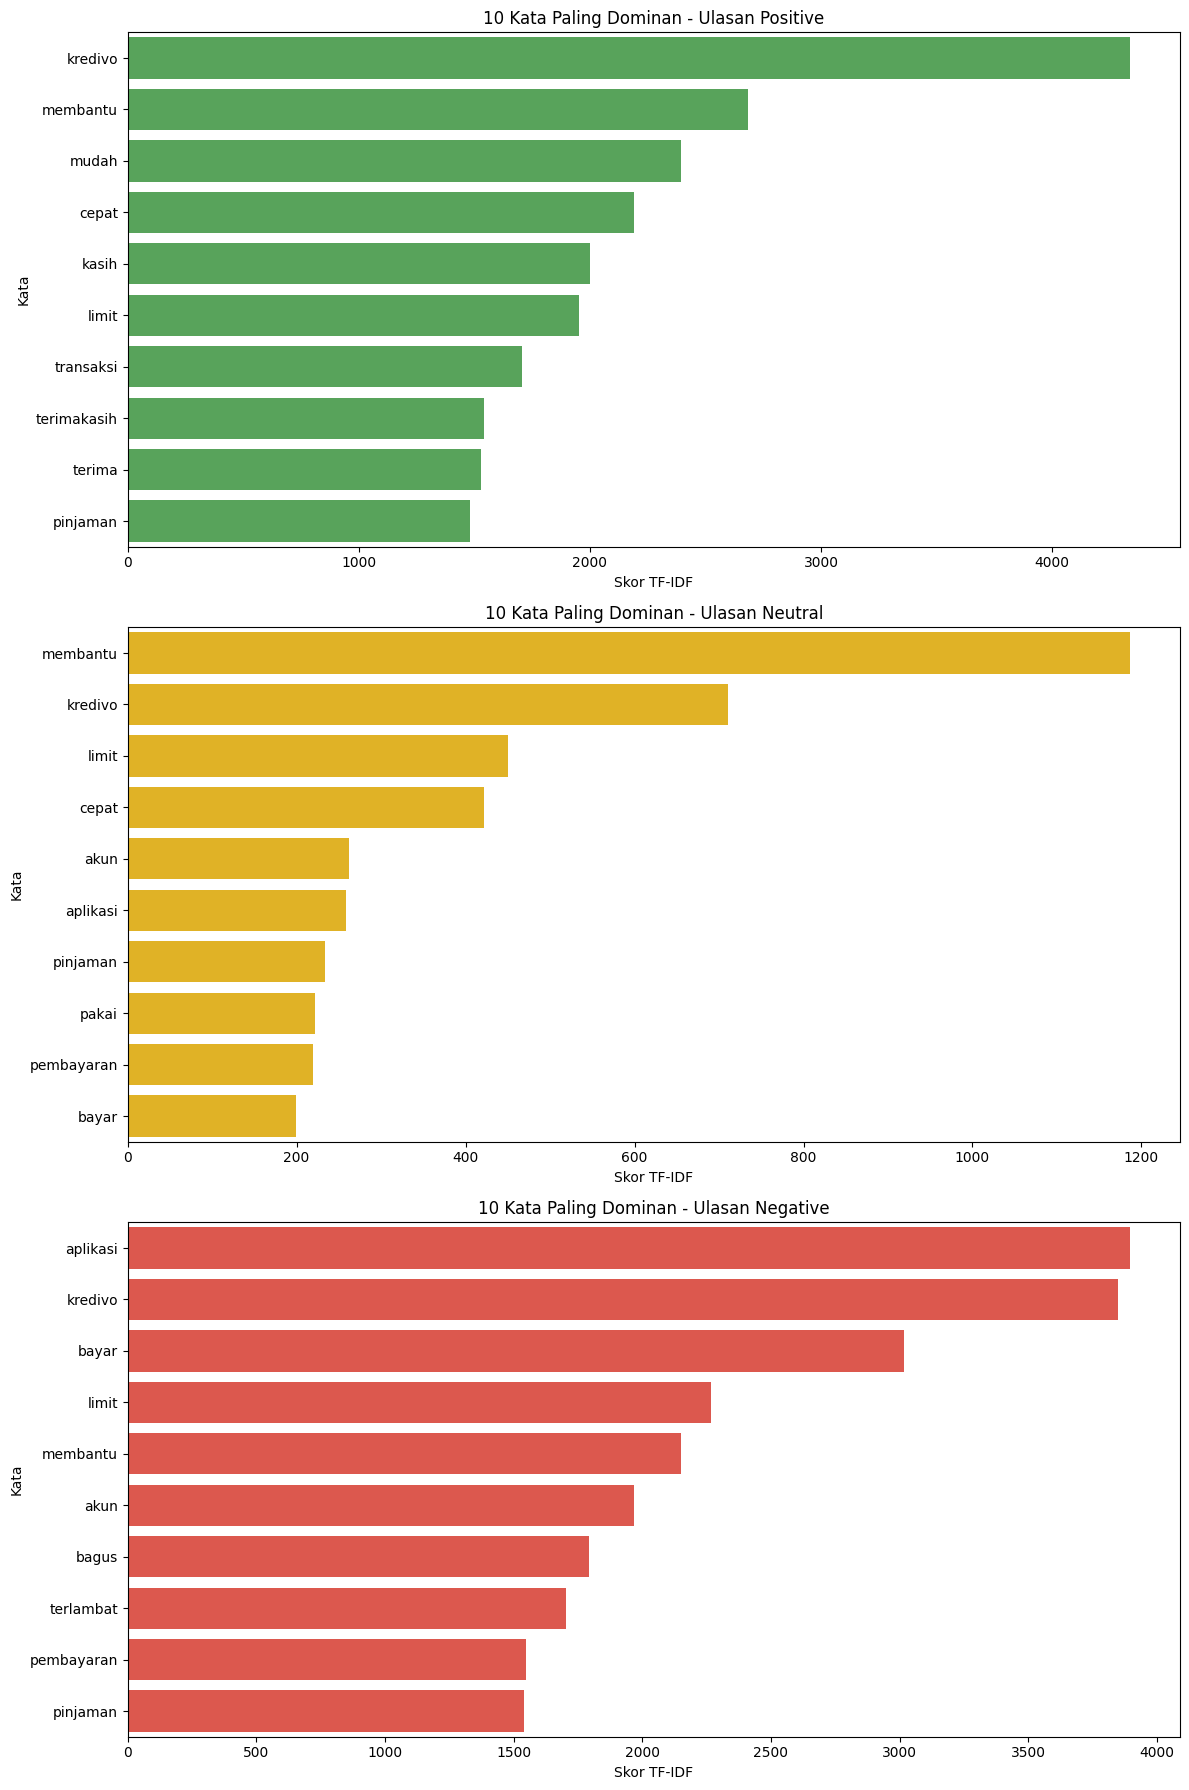

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

warna_sentimen = {'positive': '#4CAF50', 'negative': '#F44336', 'neutral': '#FFC107'}

# 1. Visualisasi Distribusi Kelas
plt.figure(figsize=(10, 6))
plot_distribusi = sns.countplot(x='polarity', data=clean_df,
                              order=['positive', 'neutral', 'negative'],
                              palette=warna_sentimen)
plt.title('Distribusi Sentimen Ulasan')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Ulasan')

# Tambahkan angka di atas setiap bar
for bar in plot_distribusi.patches:
    plot_distribusi.annotate(format(bar.get_height(), '.0f'),
                           (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                           ha='center', va='center',
                           xytext=(0, 10),
                           textcoords='offset points')
plt.show()

# 2. Distribusi Panjang Teks per Sentimen
plt.figure(figsize=(10, 6))
clean_df['panjang_teks'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.boxplot(x='polarity', y='panjang_teks', data=clean_df,
           order=['positive', 'neutral', 'negative'],
           palette=warna_sentimen)
plt.title('Distribusi Panjang Teks per Kategori Sentimen')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Kata')
plt.show()

# 3. Kata Paling Sering Muncul per Sentimen
plt.figure(figsize=(12, 15))

# Buat subplot untuk masing-masing sentimen
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

for i, sentimen in enumerate(['positive', 'neutral', 'negative']):
    # Filter data berdasarkan sentimen
    data_sentimen = clean_df[clean_df['polarity'] == sentimen]

    # Ekstrak fitur dengan TF-IDF
    vectorizer = TfidfVectorizer(max_features=50)
    X = vectorizer.fit_transform(data_sentimen['text_akhir'])
    df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    df_tfidf = df_tfidf.sum().reset_index(name='skor')
    df_tfidf = df_tfidf.sort_values('skor', ascending=False).head(10)

    # Visualisasi untuk sentimen ini
    sns.barplot(x='skor', y='index', data=df_tfidf,
               ax=axes[i], color=warna_sentimen[sentimen])
    axes[i].set_title(f'10 Kata Paling Dominan - Ulasan {sentimen.capitalize()}')
    axes[i].set_xlabel('Skor TF-IDF')
    axes[i].set_ylabel('Kata')

plt.tight_layout()
plt.show()

In [82]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

# **Data Splitting**

In [83]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,panjang_teks
0,98c535cf-16c3-44a2-ac2b-f8303e225894,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"aplikasi aneh!!! gabisa dibuka, loading mulu. CS di hubungi lewat email juga berbelit-belit ga langsung ada solusi. Mana ada aplikasi seburuk ini??? padahal sinyal stabil, tapi bener2 ngadat gabisa kebuka, gabisa dipake, parahhhhh. semoga bangkrut aja.",1,201,3.58.1,2025-03-17 13:16:38,"Hi Kak Yeni,\n\nMaaf atas kendalanya. Pastikan jaringan internet Kakak dalam keadaan stabil saat mengakses aplikasi Kredivo. Jika masih mengalami kendala, kamu bisa reinstall aplikasi Kredivo terlebih dahulu atau menghubungi CS email kami di support@kredivo.com dan nomor layanan di 08041573348.\n\nSalam hangat, Navya",2025-03-17 15:10:55,3.58.1,aplikasi aneh gabisa dibuka loading mulu CS di hubungi lewat email juga berbelitbelit ga langsung ada solusi Mana ada aplikasi seburuk ini padahal sinyal stabil tapi bener ngadat gabisa kebuka gabisa dipake parahhhhh semoga bangkrut aja,aplikasi aneh gabisa dibuka loading mulu cs di hubungi lewat email juga berbelitbelit ga langsung ada solusi mana ada aplikasi seburuk ini padahal sinyal stabil tapi bener ngadat gabisa kebuka gabisa dipake parahhhhh semoga bangkrut aja,aplikasi aneh gabisa dibuka loading melulu cs di hubungi lewat email juga berbelitbelit ga langsung ada solusi mana ada aplikasi seburuk ini padahal sinyal stabil tapi benar ngadat gabisa kebuka gabisa dipake parahhhhh semoga bangkrut saja,"[aplikasi, aneh, gabisa, dibuka, loading, melulu, cs, di, hubungi, lewat, email, juga, berbelitbelit, ga, langsung, ada, solusi, mana, ada, aplikasi, seburuk, ini, padahal, sinyal, stabil, tapi, benar, ngadat, gabisa, kebuka, gabisa, dipake, parahhhhh, semoga, bangkrut, saja]","[aplikasi, aneh, gabisa, dibuka, loading, melulu, cs, hubungi, email, berbelitbelit, langsung, solusi, aplikasi, seburuk, sinyal, stabil, ngadat, gabisa, kebuka, gabisa, dipake, parahhhhh, semoga, bangkrut]",aplikasi aneh gabisa dibuka loading melulu cs hubungi email berbelitbelit langsung solusi aplikasi seburuk sinyal stabil ngadat gabisa kebuka gabisa dipake parahhhhh semoga bangkrut,-7,negative,24
1,db016757-921b-454d-b8db-73c2de221e27,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"2 kali baru bisa cair, Untuk ke 3 kali gabisa di pake transaksi apapun. Udah lunas tgl 21 Januari sampe detik ini belum bisa di pake limitnya. Di telponin cs kredivo ""kenapa belum ada transaksi lagi kak"" mikir Weh pake di tanya lagi kenapa. Padahal gapernah telat bayar, bayar selalu sebelum jatuh tempo. Tiba tiba kredivo score c. Mau transaksi apapun ga bisa. Yg bayarnya ga pernah telat di giniin sih.",5,688,3.58.1,2025-03-13 05:53:55,"Hi Kak Desi,\n\nTerima kasih atas ratingnya :). Semoga Kredivo dapat memberikan kemudahan dan kenyamanan pembayaran transaksi Kakak. Jika memiliki kendala, silakan hubungi customer support di 08041573348 atau email ke support@kredivo.com menggunakan email yang terdaftar dan layanan live chat pada aplikasi.\n\nSalam hangat,\nDina",2025-03-13 06:14:51,3.58.1,kali baru bisa cair Untuk ke kali gabisa di pake transaksi apapun Udah lunas tgl Januari sampe detik ini belum bisa di pake limitnya Di telponin cs kredivo kenapa belum ada transaksi lagi kak mikir Weh pake di tanya lagi kenapa Padahal gapernah telat bayar bayar selalu sebelum jatuh tempo Tiba tiba kredivo score c Mau transaksi apapun ga bisa Yg bayarnya ga pernah telat di giniin sih,kali baru bisa cair untuk ke kali gabisa di pake transaksi apapun udah lunas tgl januari sampe detik ini belum bisa di pake limitnya di telponin cs kredivo kenapa belum ada transa

In [84]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB  # Model sederhana untuk uji cepat

# Pipeline: TF-IDF + Model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# Parameter grid
params = {
    'tfidf__max_features': [500, 1000, 2000],
    'tfidf__min_df': [1, 3, 5],
    'tfidf__max_df': [0.7, 0.9, 1.0],
    'tfidf__ngram_range': [(1,1), (1,2)]  # Cek unigram vs bigram
}

# Grid Search
grid_search = GridSearchCV(
    pipeline,
    params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X, y)  # X: clean_df['text_akhir'], y: clean_df['polarity']

# Hasil terbaik
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'tfidf__max_df': 0.7, 'tfidf__max_features': 2000, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}
Best score: 0.7267841453384463


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Gunakan parameter terbaik dari Grid Search
tfidf = TfidfVectorizer(
    max_features=2000,  # Ambil 2000 fitur terpenting
    min_df=1,           # Abaikan kata yang muncul di <3 dokumen
    max_df=0.7,         # Abaikan kata yang muncul di >70% dokumen
    ngram_range=(1, 2)  # Pertimbangkan unigram dan bigram
)

# Ekstraksi fitur
X_tfidf = tfidf.fit_transform(X)  # X adalah clean_df['text_akhir']
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Cek hasil (opsional)
print("Shape:", X_tfidf.shape)  # Seharusnya (n_samples, 2000)
print("Contoh fitur:", tfidf.get_feature_names_out()[:10])  # Contoh fitur

Shape: (63027, 2000)
Contoh fitur: ['aamiin' 'abal' 'accord' 'accord cepat' 'accord limit' 'account' 'admin'
 'admin kredivo' 'administrasi' 'adminnya']


In [88]:
features_df

,aamiin,abal,accord,accord cepat,accord limit,account,admin,admin kredivo,administrasi,adminnya,...,wajar,wajib,watching,whatsapp,wifi,wilayah,wktu,yaaa,yah,yng
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.274299,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
63023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
63024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
63025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [89]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# **Pemodelan**

## 1. Naive Bayes

In [90]:
from sklearn.naive_bayes import BernoulliNB

# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()

# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.6925685726185518
Naive Bayes - accuracy_test: 0.6951451689671585


## 2. Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

# Membuat objek model Random Forest
random_forest = RandomForestClassifier()

# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9988893516590309
Random Forest - accuracy_test: 0.8311121688085039


## 3. Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.9161857162690149
Logistic Regression - accuracy_test: 0.9071870537839124


## 4. Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9988893516590309
Decision Tree - accuracy_test: 0.745914643820403


# **Perbandingan**

In [94]:
import pandas as pd

# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                 Model  Accuracy Test
0          Naive Bayes       0.695145
1        Random Forest       0.831112
2  Logistic Regression       0.907187
3        Decision Tree       0.745915


In [95]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)


                 Model  Accuracy Test
2  Logistic Regression       0.907187
1        Random Forest       0.831112
3        Decision Tree       0.745915
0          Naive Bayes       0.695145


In [96]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru (SAMA seperti sebelumnya)
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru (PERUBAHAN DI SINI)
prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# Menampilkan hasil prediksi (DIMODIFIKASI untuk 3 kelas)
sentimen = prediksi_sentimen[0]
if sentimen == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif sentimen == 'neutral':
    print("Sentimen kalimat baru adalah NETRAL.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: Pinjaman mudah dicairkan
Sentimen kalimat baru adalah POSITIF.


In [97]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru (SAMA seperti sebelumnya)
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru (PERUBAHAN DI SINI)
prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# Menampilkan hasil prediksi (DIMODIFIKASI untuk 3 kelas)
sentimen = prediksi_sentimen[0]
if sentimen == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif sentimen == 'neutral':
    print("Sentimen kalimat baru adalah NETRAL.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: Biasa aja
Sentimen kalimat baru adalah NETRAL.


In [98]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru (SAMA seperti sebelumnya)
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru (PERUBAHAN DI SINI)
prediksi_sentimen = logistic_regression.predict(X_kalimat_baru)

# Menampilkan hasil prediksi (DIMODIFIKASI untuk 3 kelas)
sentimen = prediksi_sentimen[0]
if sentimen == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
elif sentimen == 'neutral':
    print("Sentimen kalimat baru adalah NETRAL.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: Pengajuan selalu ditolak
Sentimen kalimat baru adalah NEGATIF.


# **Kriteria Optional**

## Menggunakan Algoritma Deep Learning

### Import Library

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### Skema Pelatihan 1: LSTM dengan Embedding pembagian data 80/20

In [100]:
# Skema 1: LSTM dengan Embedding (TF-IDF), pembagian data 80/20
def deep_learning_scheme1():
    # Label Encoding
    le = LabelEncoder()
    y_encoded = le.fit_transform(clean_df['polarity'])

    # Tokenisasi teks
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(clean_df['text_akhir'])
    X_seq = tokenizer.texts_to_sequences(clean_df['text_akhir'])
    X_pad = pad_sequences(X_seq, maxlen=200)

    # Split data 80/20
    X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

    # Model LSTM
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

    # Training
    history = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_data=(X_test, y_test),
                        verbose=1)

    # Evaluasi
    train_acc = history.history['accuracy'][-1]
    test_acc = history.history['val_accuracy'][-1]

    return model, history, train_acc, test_acc

model1, history1, train_acc1, test_acc1 = deep_learning_scheme1()
print(f"Skema 1 - Akurasi Training: {train_acc1:.4f}, Akurasi Testing: {test_acc1:.4f}")

Epoch 1/10
394/394 [==============================] - 725s 2s/step - loss: 0.4325 - accuracy: 0.8276 - val_loss: 0.2348 - val_accuracy: 0.9155
Epoch 2/10
394/394 [==============================] - 697s 2s/step - loss: 0.2046 - accuracy: 0.9272 - val_loss: 0.2078 - val_accuracy: 0.9239
Epoch 3/10
394/394 [==============================] - 694s 2s/step - loss: 0.1551 - accuracy: 0.9440 - val_loss: 0.2070 - val_accuracy: 0.9287
Epoch 4/10
394/394 [==============================] - 692s 2s/step - loss: 0.1290 - accuracy: 0.9543 - val_loss: 0.2049 - val_accuracy: 0.9281
Epoch 5/10
394/394 [==============================] - 696s 2s/step - loss: 0.1107 - accuracy: 0.9613 - val_loss: 0.2227 - val_accuracy: 0.9314
Epoch 6/10
394/394 [==============================] - 715s 2s/step - loss: 0.0950 - accuracy: 0.9670 - val_loss: 0.2330 - val_accuracy: 0.9300
Epoch 7/10
394/394 [==============================] - 691s 2s/step - loss: 0.0866 - accuracy: 0.9702 - val_loss: 0.2353 - val_accuracy: 0.9288

### Skema Pelatihan 2: CNN dengan Word Embedding pembagian data 80/20

In [101]:
# Skema 2: CNN dengan Word Embedding (Word2Vec), pembagian data 80/20
from gensim.models import Word2Vec

def deep_learning_scheme2():
    # Persiapan Word2Vec
    sentences = [text.split() for text in clean_df['text_akhir']]
    w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

    # Membuat embedding matrix
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(clean_df['text_akhir'])

    embedding_matrix = np.zeros((5000, 100))
    for word, i in tokenizer.word_index.items():
        if i < 5000:
            if word in w2v_model.wv:
                embedding_matrix[i] = w2v_model.wv[word]

    # Label Encoding
    le = LabelEncoder()
    y_encoded = le.fit_transform(clean_df['polarity'])

    # Tokenisasi teks
    X_seq = tokenizer.texts_to_sequences(clean_df['text_akhir'])
    X_pad = pad_sequences(X_seq, maxlen=200)

    # Split data 80/20
    X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

    # Model CNN
    model = Sequential()
    model.add(Embedding(input_dim=5000,
                       output_dim=100,
                       input_length=200,
                       weights=[embedding_matrix],
                       trainable=False))
    model.add(tf.keras.layers.Conv1D(128, 5, activation='relu'))
    model.add(tf.keras.layers.GlobalMaxPooling1D())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

    # Training
    history = model.fit(X_train, y_train,
                        epochs=15,
                        batch_size=128,
                        validation_data=(X_test, y_test),
                        verbose=1)

    # Evaluasi
    train_acc = history.history['accuracy'][-1]
    test_acc = history.history['val_accuracy'][-1]

    return model, history, train_acc, test_acc

model2, history2, train_acc2, test_acc2 = deep_learning_scheme2()
print(f"Skema 2 - Akurasi Training: {train_acc2:.4f}, Akurasi Testing: {test_acc2:.4f}")

Epoch 1/15
394/394 [==============================] - 90s 218ms/step - loss: 0.7122 - accuracy: 0.7112 - val_loss: 0.5745 - val_accuracy: 0.7623
Epoch 2/15
394/394 [==============================] - 82s 209ms/step - loss: 0.5914 - accuracy: 0.7685 - val_loss: 0.5420 - val_accuracy: 0.7858
Epoch 3/15
394/394 [==============================] - 82s 208ms/step - loss: 0.5443 - accuracy: 0.7910 - val_loss: 0.5158 - val_accuracy: 0.7983
Epoch 4/15
394/394 [==============================] - 87s 220ms/step - loss: 0.5204 - accuracy: 0.8017 - val_loss: 0.5031 - val_accuracy: 0.8018
Epoch 5/15
394/394 [==============================] - 84s 212ms/step - loss: 0.4915 - accuracy: 0.8133 - val_loss: 0.4986 - val_accuracy: 0.8056
Epoch 6/15
394/394 [==============================] - 85s 217ms/step - loss: 0.4731 - accuracy: 0.8206 - val_loss: 0.4964 - val_accuracy: 0.8079
Epoch 7/15
394/394 [==============================] - 83s 211ms/step - loss: 0.4559 - accuracy: 0.8259 - val_loss: 0.4943 - val_ac

### Skema Pelatihan 3: Transformer dengan TF-IDF pembagian data 70/30

In [113]:
# Skema 3: Transformer kecil dengan TF-IDF, pembagian data 70/30
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization

def deep_learning_scheme3():
    # Gunakan TF-IDF yang sudah dibuat sebelumnya
    X_tfidf = tfidf.transform(clean_df['text_akhir'])

    # Label Encoding
    le = LabelEncoder()
    y_encoded = le.fit_transform(clean_df['polarity'])

    # Split data 70/30
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf.toarray(), y_encoded, test_size=0.3, random_state=42)

    # Transformer kecil
    inputs = tf.keras.Input(shape=(X_tfidf.shape[1],))

    # Attention layer
    attention_output = MultiHeadAttention(num_heads=4, key_dim=128)(inputs[:, tf.newaxis, :], inputs[:, tf.newaxis, :])
    attention_output = tf.squeeze(attention_output, axis=1)  # Hapus dimensi tambahan
    attention_output = LayerNormalization(epsilon=1e-6)(inputs + attention_output)

    # Feed forward
    x = Dense(256, activation='relu')(attention_output)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(3)(x)  # Tanpa activation function
    outputs = tf.keras.layers.Activation('softmax')(x)  # Gunakan Activation layer terpisah

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(loss='sparse_categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                 metrics=['accuracy'])

    # Training
    history = model.fit(X_train, y_train,
                        epochs=20,
                        batch_size=64,
                        validation_data=(X_test, y_test),
                        verbose=1)

    # Evaluasi
    train_acc = history.history['accuracy'][-1]
    test_acc = history.history['val_accuracy'][-1]

    return model, history, train_acc, test_acc

# Jalankan model
model3, history3, train_acc3, test_acc3 = deep_learning_scheme3()
print(f"Skema 3 - Akurasi Training: {train_acc3:.4f}, Akurasi Testing: {test_acc3:.4f}")

Epoch 1/20
690/690 [==============================] - 73s 103ms/step - loss: 0.4935 - accuracy: 0.8086 - val_loss: 0.3008 - val_accuracy: 0.8878
Epoch 2/20
690/690 [==============================] - 72s 104ms/step - loss: 0.2985 - accuracy: 0.8929 - val_loss: 0.2719 - val_accuracy: 0.9018
Epoch 3/20
690/690 [==============================] - 70s 102ms/step - loss: 0.2577 - accuracy: 0.9090 - val_loss: 0.2727 - val_accuracy: 0.9052
Epoch 4/20
690/690 [==============================] - 72s 105ms/step - loss: 0.2348 - accuracy: 0.9181 - val_loss: 0.2675 - val_accuracy: 0.9069
Epoch 5/20
690/690 [==============================] - 65s 95ms/step - loss: 0.2151 - accuracy: 0.9231 - val_loss: 0.2661 - val_accuracy: 0.9118
Epoch 6/20
690/690 [==============================] - 67s 97ms/step - loss: 0.2012 - accuracy: 0.9288 - val_loss: 0.2779 - val_accuracy: 0.9112
Epoch 7/20
690/690 [==============================] - 71s 103ms/step - loss: 0.1839 - accuracy: 0.9360 - val_loss: 0.2726 - val_accu

### Evaluasi

                       Skema  Training Accuracy  Testing Accuracy Data Split  \
0      LSTM dengan Embedding           0.979473          0.928447      80/20   
1        CNN dengan Word2Vec           0.861030          0.813184      80/20   
2  Transformer dengan TF-IDF           0.977447          0.907557      70/30   

  Feature Extraction  
0             TF-IDF  
1           Word2Vec  
2             TF-IDF  


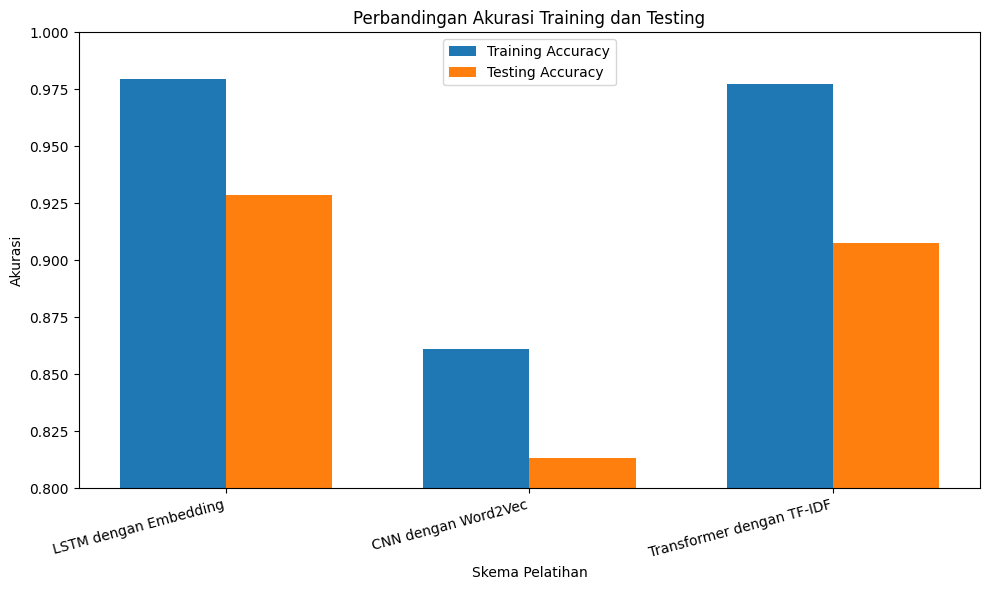

In [114]:
# Membandingkan hasil ketiga skema
results = {
    'Skema': ['LSTM dengan Embedding', 'CNN dengan Word2Vec', 'Transformer dengan TF-IDF'],
    'Training Accuracy': [train_acc1, train_acc2, train_acc3],
    'Testing Accuracy': [test_acc1, test_acc2, test_acc3],
    'Data Split': ['80/20', '80/20', '70/30'],
    'Feature Extraction': ['TF-IDF', 'Word2Vec', 'TF-IDF']
}

results_df = pd.DataFrame(results)
print(results_df)

# Visualisasi akurasi
plt.figure(figsize=(10, 6))
x = np.arange(3)
width = 0.35

plt.bar(x - width/2, results_df['Training Accuracy'], width, label='Training Accuracy')
plt.bar(x + width/2, results_df['Testing Accuracy'], width, label='Testing Accuracy')

plt.xlabel('Skema Pelatihan')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Training dan Testing')
plt.xticks(x, results_df['Skema'], rotation=15, ha='right')
plt.legend()
plt.ylim(0.8, 1.0)
plt.tight_layout()
plt.show()

### Simpan model dengan akurasi terbaik untuk inference

In [117]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense

def deep_learning_scheme1_save():
    # Label Encoding
    le = LabelEncoder()
    y_encoded = le.fit_transform(clean_df['polarity'])

    # Tokenisasi teks
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(clean_df['text_akhir'])
    X_seq = tokenizer.texts_to_sequences(clean_df['text_akhir'])
    X_pad = pad_sequences(X_seq, maxlen=200)

    # Split data 80/20
    X_train, X_test, y_train, y_test = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42)

    # Model LSTM
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(32)))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

    # Training
    history = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_data=(X_test, y_test),
                        verbose=1)

    # Evaluasi
    train_acc = history.history['accuracy'][-1]
    test_acc = history.history['val_accuracy'][-1]

    # Kembalikan semua yang diperlukan untuk disimpan
    return model, history, train_acc, test_acc, tokenizer, le

# Panggil fungsi dan terima semua return value
model1, history1, train_acc1, test_acc1, tokenizer, le = deep_learning_scheme1_save()

model1.save('lstm_model.h5')
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

Epoch 1/10
394/394 [==============================] - 727s 2s/step - loss: 0.4209 - accuracy: 0.8376 - val_loss: 0.2262 - val_accuracy: 0.9170
Epoch 2/10
394/394 [==============================] - 693s 2s/step - loss: 0.2070 - accuracy: 0.9269 - val_loss: 0.2066 - val_accuracy: 0.9268
Epoch 3/10
394/394 [==============================] - 697s 2s/step - loss: 0.1581 - accuracy: 0.9433 - val_loss: 0.2144 - val_accuracy: 0.9231
Epoch 4/10
394/394 [==============================] - 656s 2s/step - loss: 0.1326 - accuracy: 0.9522 - val_loss: 0.2163 - val_accuracy: 0.9300
Epoch 5/10
394/394 [==============================] - 693s 2s/step - loss: 0.1169 - accuracy: 0.9594 - val_loss: 0.2292 - val_accuracy: 0.9280
Epoch 6/10
394/394 [==============================] - 695s 2s/step - loss: 0.1008 - accuracy: 0.9656 - val_loss: 0.2253 - val_accuracy: 0.9296
Epoch 7/10
394/394 [==============================] - 697s 2s/step - loss: 0.0859 - accuracy: 0.9707 - val_loss: 0.2467 - val_accuracy: 0.9304

In [118]:
# Jalankan di cell Colab
!pip freeze > requirements.txt

# Unduh file ke komputer
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>